# **Problem Statement** :
With the abundance of medical data and the emergence of Data Science, startups are tackling the challenge of developing predictive indicators for prevalent diseases like cardiovascular diseases (CVDs), which claim millions of lives annually. Heart failure, often stemming from CVDs, requires early detection and management, where machine learning models play a vital role. By automating detection and management, AI technologies pave the way for addressing current health challenges and shifting focus to the next.

# **Aim** :
* To predict whether a patient is prone to heart failure depending on multiple attributes.
* It is a binary classification with multiple numerical and categorical features.



# Dataset Information
* **Age** : age of the patient [years]
* **Sex** : sex of the patient [M: Male, F: Female]
* **ChestPainType** : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* **RestingBP** : resting blood pressure [mm Hg]
* **Cholesterol** : serum cholesterol [mm/dl]
* **FastingBS** : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* **RestingECG** : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* **MaxHR** : maximum heart rate achieved [Numeric value between 60 and 202]
* **ExerciseAngina** : exercise-induced angina [Y: Yes, N: No]
* **Oldpeak** : oldpeak = ST [Numeric value measured in depression]
* **ST_Slope** : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* **HeartDisease** : output class [1: heart disease, 0: Normal]

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df=pd.read_csv('heart.csv')
print(df)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [53]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [54]:
# RestingBP cannot be zero, hence the row having that value is being deleted
df.drop(index=df[df['RestingBP']==0].index,inplace=True)

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,917.0,53.509269,9.437636,28.0,47.0,54.0,60.0,77.0
RestingBP,917.0,132.540894,17.999749,80.0,120.0,130.0,140.0,200.0
Cholesterol,917.0,199.016358,109.246330,0.0,174.0,223.0,267.0,603.0
FastingBS,917.0,0.233370,0.423206,0.0,0.0,0.0,0.0,1.0
MaxHR,917.0,136.789531,25.467129,60.0,120.0,138.0,156.0,202.0
Oldpeak,917.0,0.886696,1.066960,-2.6,0.0,0.6,1.5,6.2
HeartDisease,917.0,0.552890,0.497466,0.0,0.0,1.0,1.0,1.0


In [56]:
print("Sex:",df['Sex'].unique())
print("RestingECG:",df['RestingECG'].unique())
print("ChestPainType:",df['ChestPainType'].unique())
print("ExerciseAngina:",df['ExerciseAngina'].unique())
print("ST_Slope:",df['ST_Slope'].unique())

Sex: ['M' 'F']
RestingECG: ['Normal' 'ST' 'LVH']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
ExerciseAngina: ['N' 'Y']
ST_Slope: ['Up' 'Flat' 'Down']


# Exploratory Data Analysis
* It's analysis approach that identifies general patterns in the data. These patterns include outliers and features of the data that might be unexpected.
* Dataset is divided into **Categorical** and **Numerical Attributes**

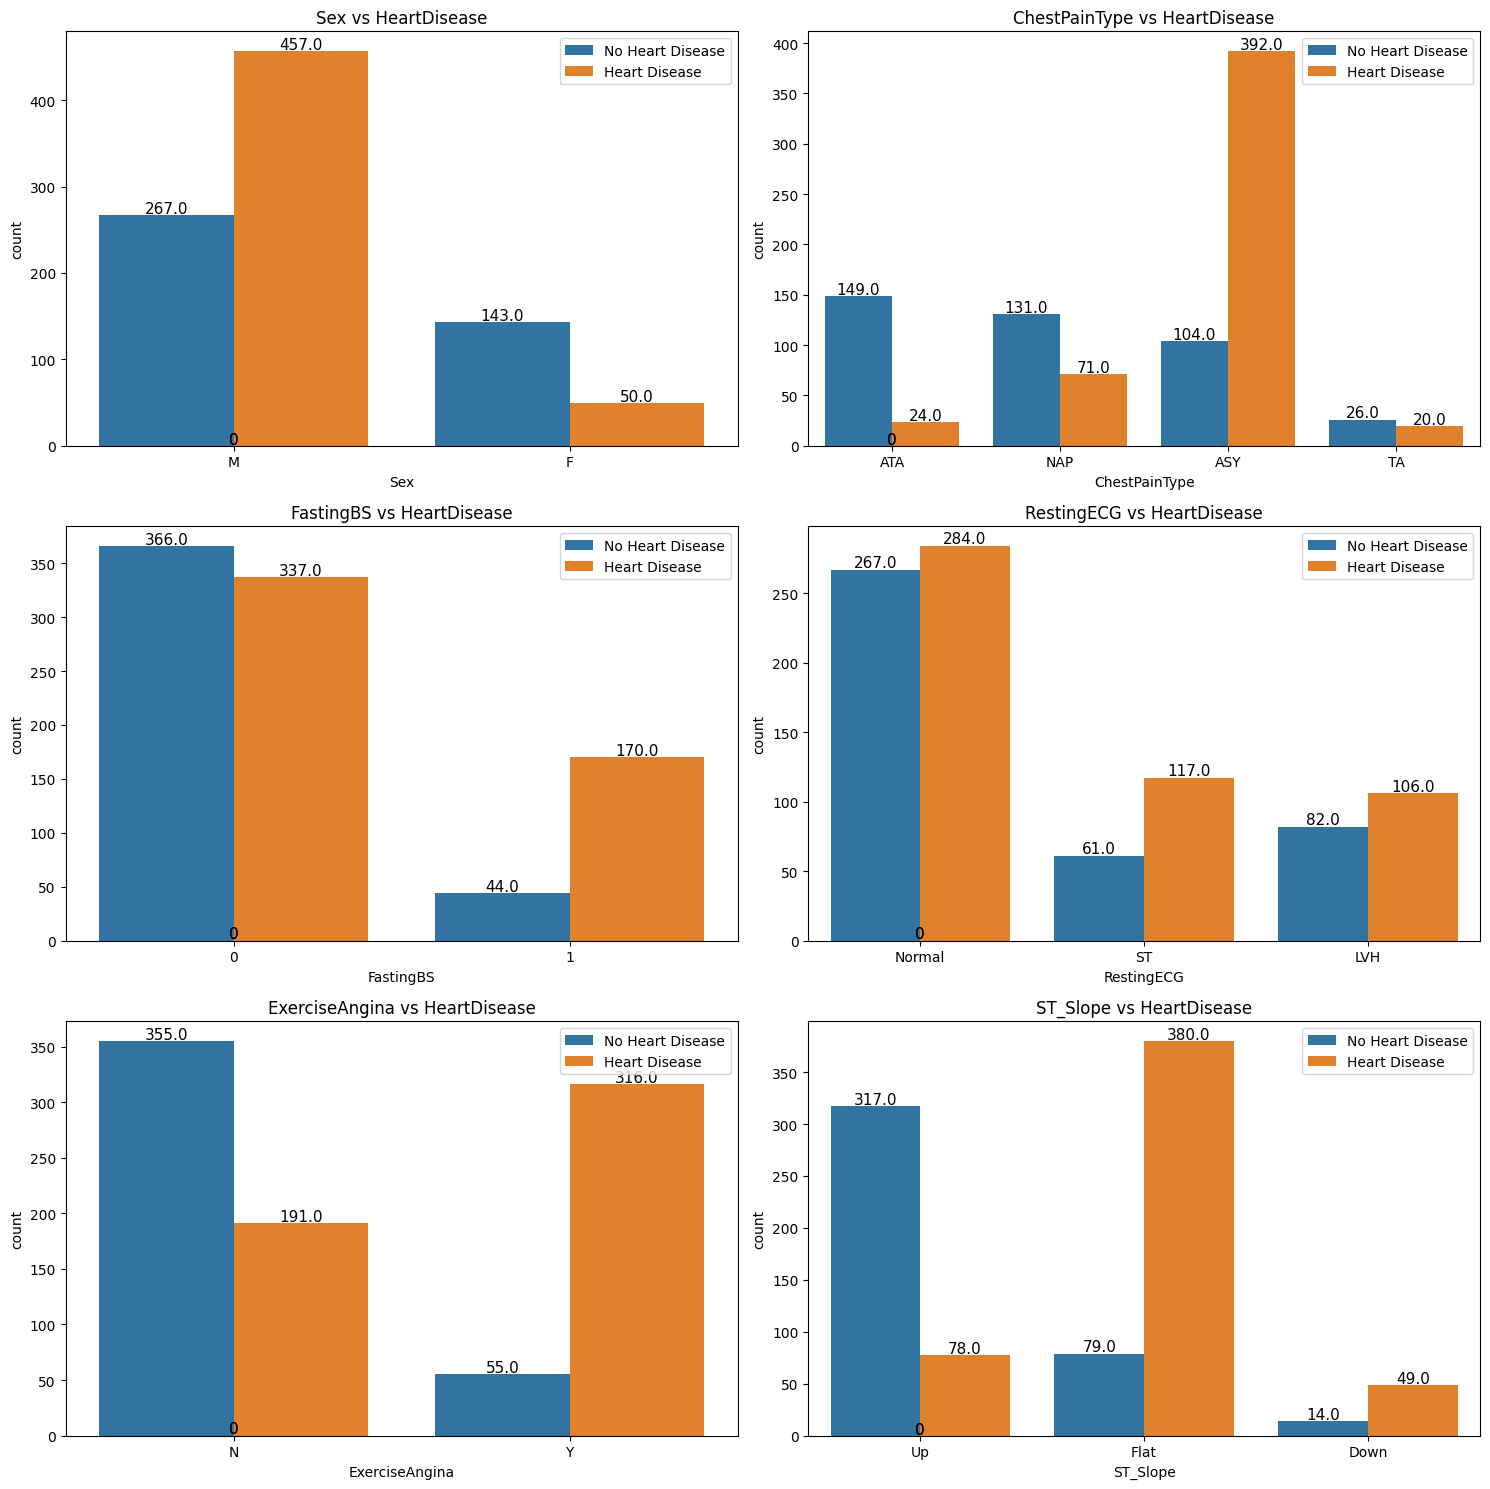

In [57]:
# Categorical Characteristics vs Outcome
categorical_features=['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

for i, feature in enumerate(categorical_features[:-1]):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.countplot(x=feature, data=df, hue="HeartDisease", ax=ax)
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)
    title = feature + ' vs HeartDisease'
    ax.set_title(title)
    ax.legend(['No Heart Disease', 'Heart Disease'])

plt.tight_layout()
plt.show()

## Results
* Male population has more heart disease patients as in the case of Female population
* ASY type of chest pain boldly points towards major chances of heart disease.
* Patients diagnosed with Fasting Blood Sugar and no Fasting Blood Sugar have significant heart disease patients.
* RestingECG does not present with a clear cut category that highlights heart disease patients. All the 3 values consist of high number of heart disease patients.
* Exercise Induced Engina definitely bumps the probability of being diagnosed with heart diseases.
* With the ST_Slope values, **flat slope** displays a very high probability of being diagnosed with heart disease.

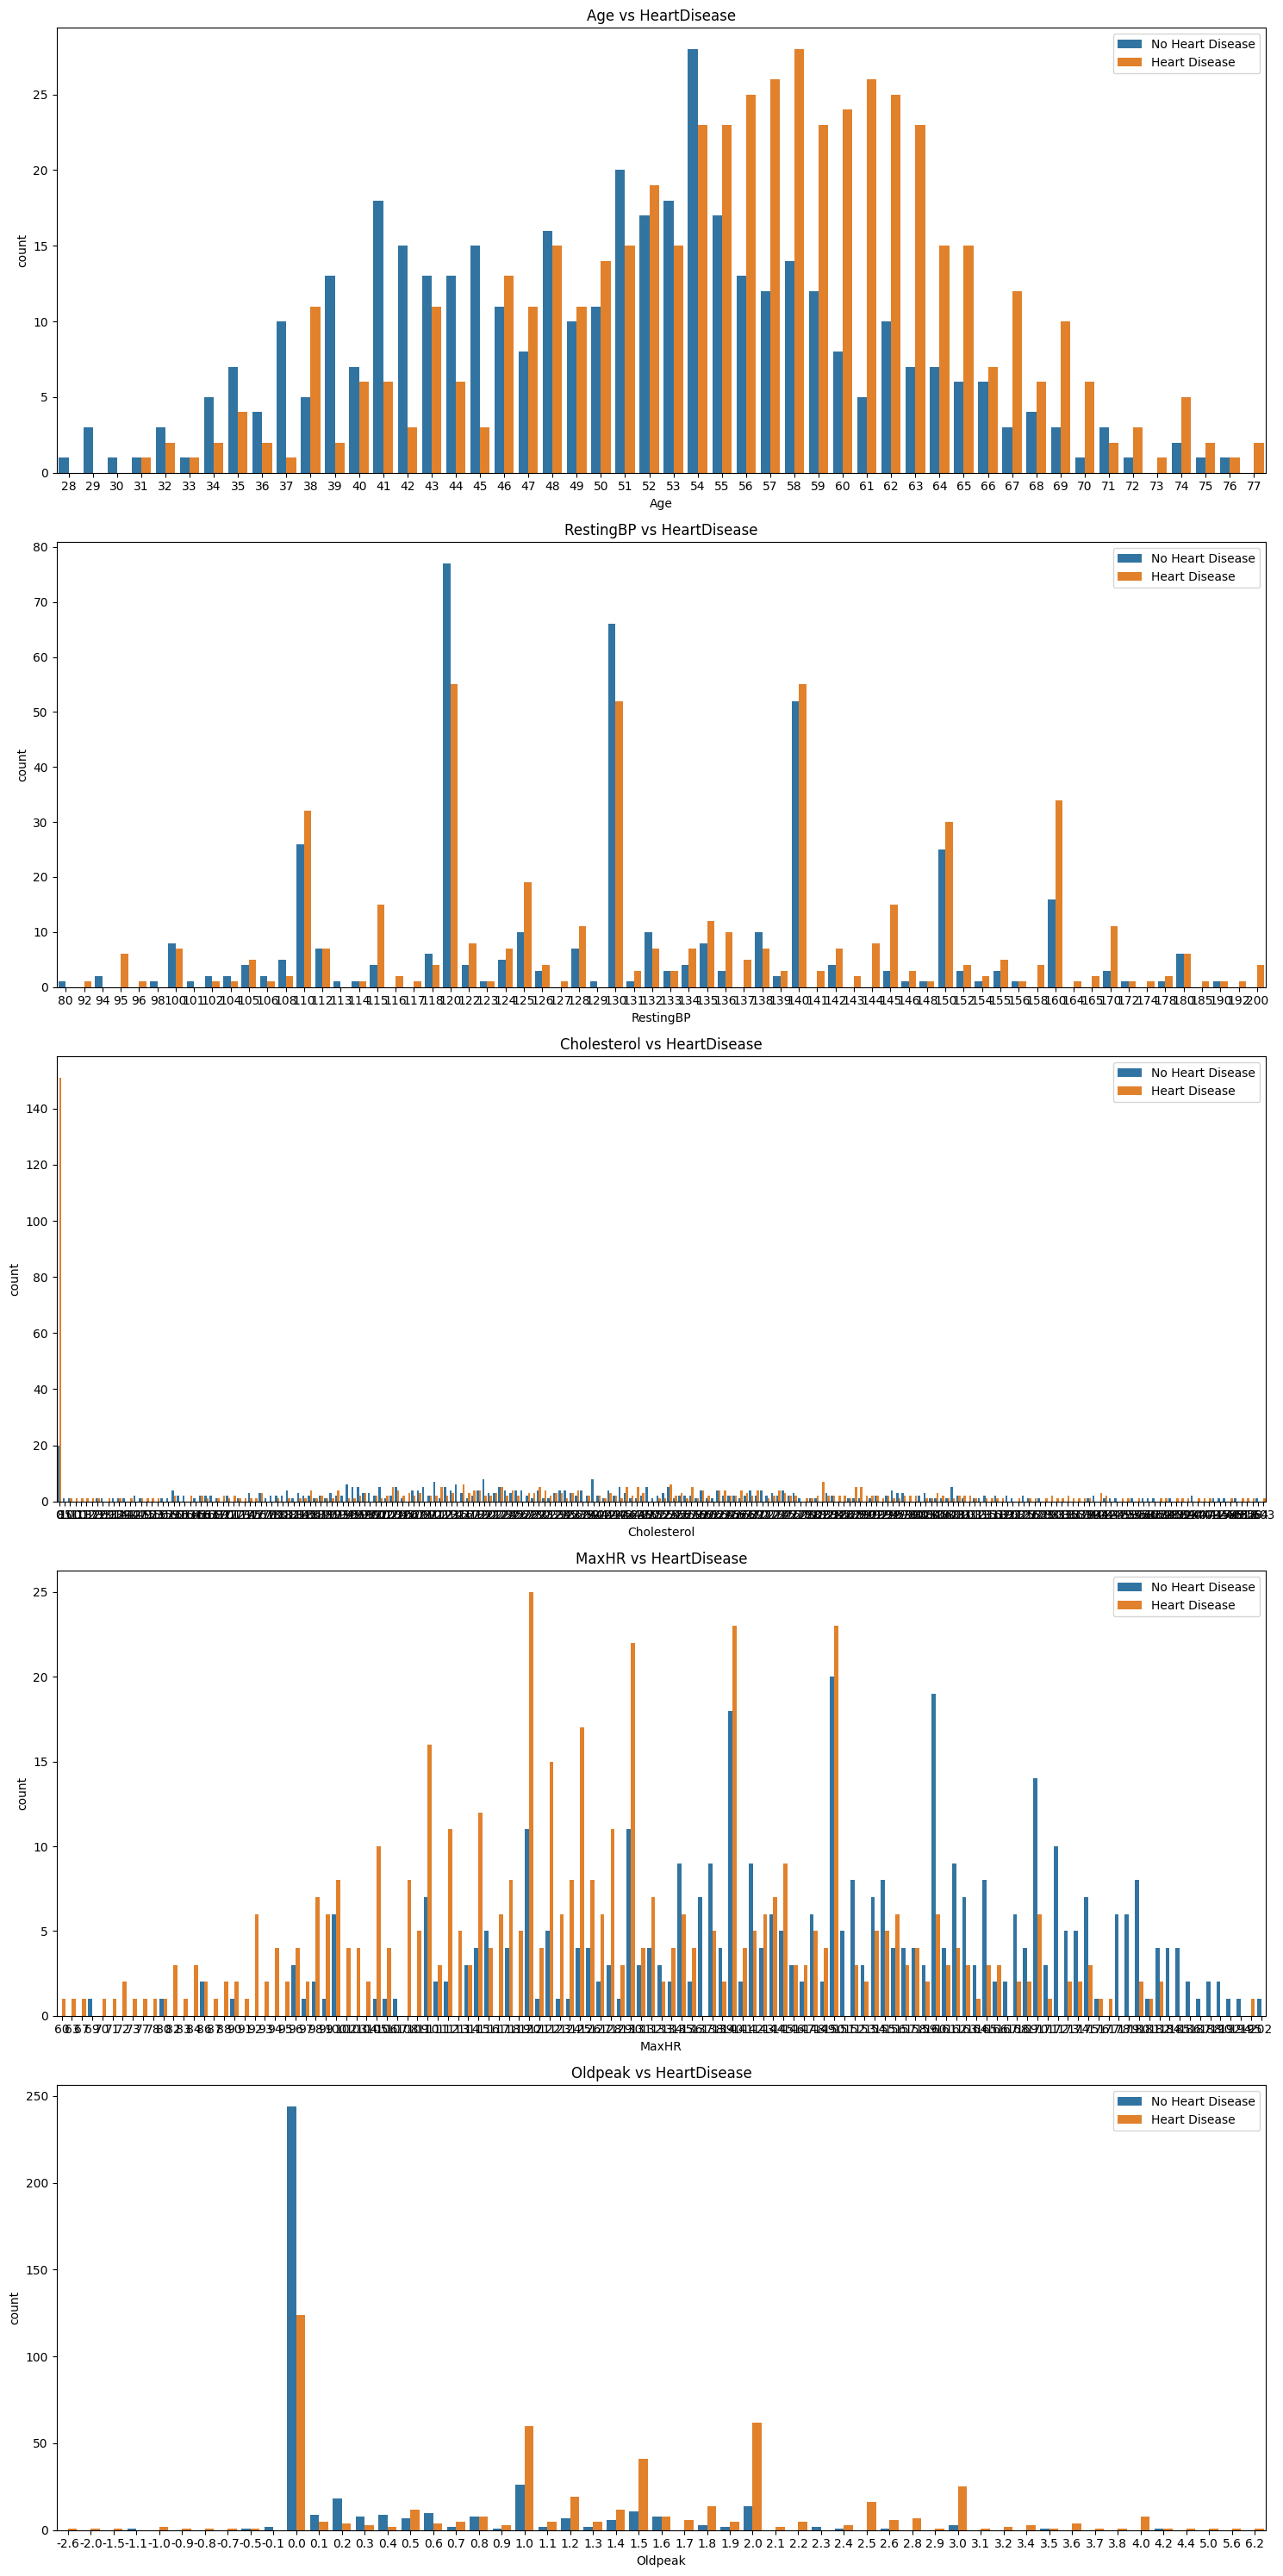

In [58]:
# Numerical Characteristics vs Outcome
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 30))

for i in range(len(numerical_features)):
    ax = axes[i]  # Single indexing here
    sns.countplot(x=numerical_features[i], data=df, hue="HeartDisease", ax=ax)
    title = numerical_features[i] + ' vs HeartDisease'
    ax.set_title(title)
    ax.legend(['No Heart Disease', 'Heart Disease'])

plt.tight_layout()
plt.show()

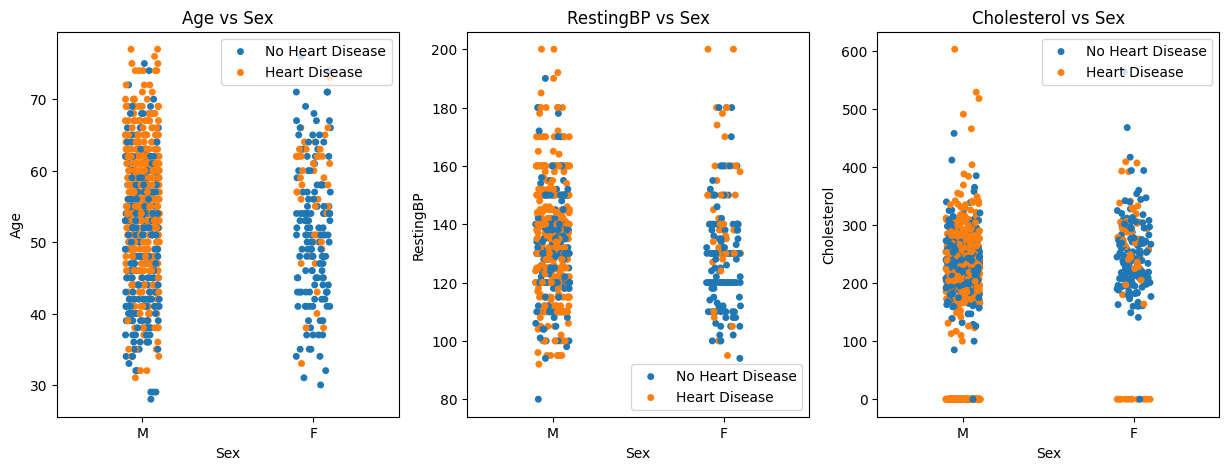

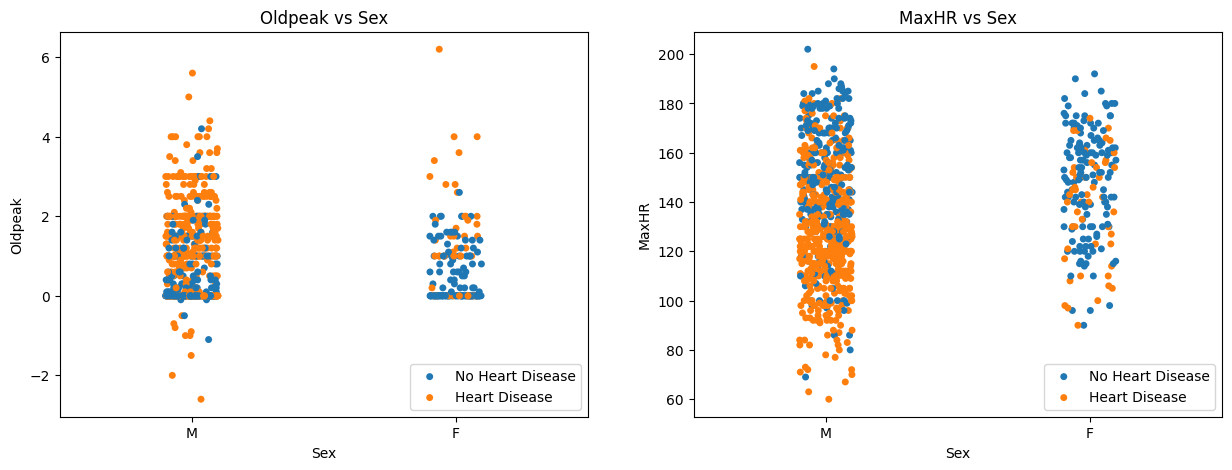

In [59]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = df,hue = 'HeartDisease');
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = df,hue = 'HeartDisease');
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex'
    plt.title(title);

## Result
* Male population displays heart diseases at near about all the values of the numerical features. *Above the age of 50, positive old peak values and maximum heart rate below 140, heart diseases in male population become dense.*
* Female population data points are very less as compared to male population data points. Hence, we cannot point to specific ranges or values that display cases of heart diseases.

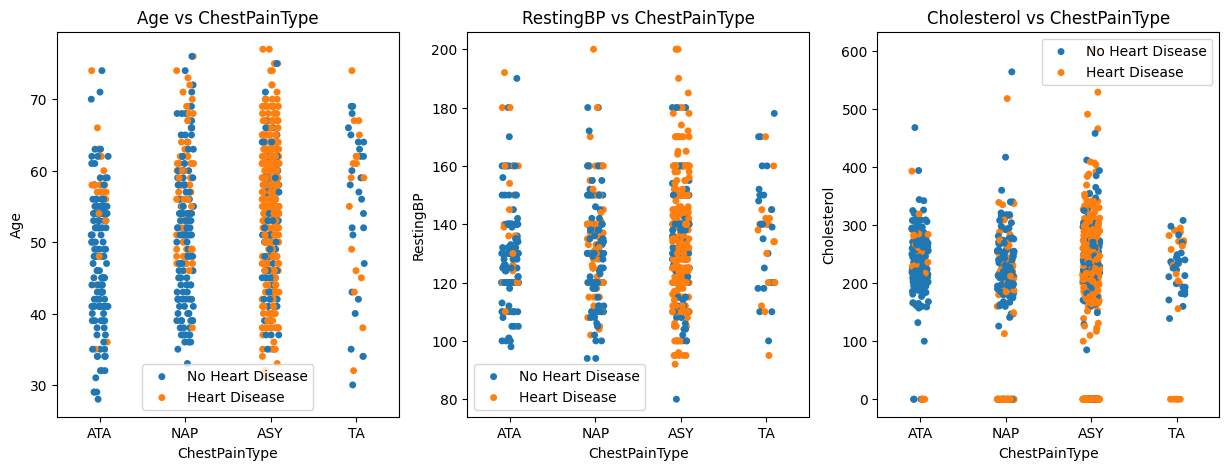

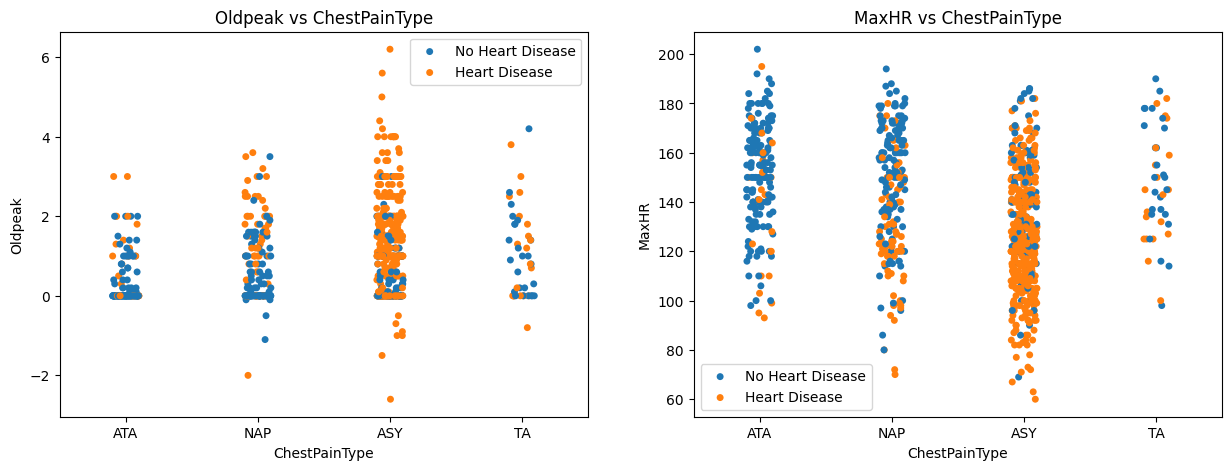

In [60]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ChestPainType',y = numerical_features[i],data = df,hue = 'HeartDisease');
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ChestPainType',y = numerical_features[i],data = df,hue = 'HeartDisease');
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType'
    plt.title(title);

### Result : Dominated by **ASY** Chestpain

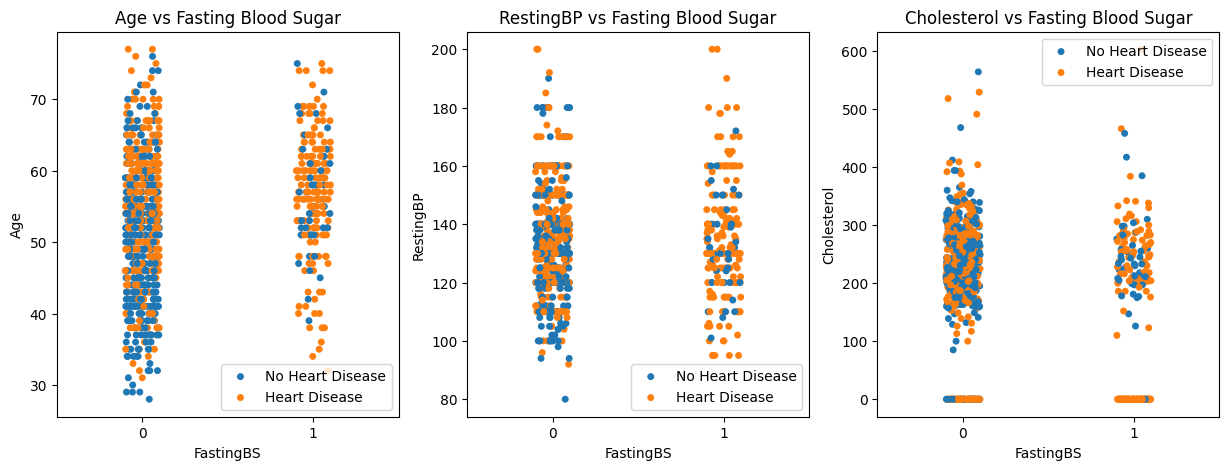

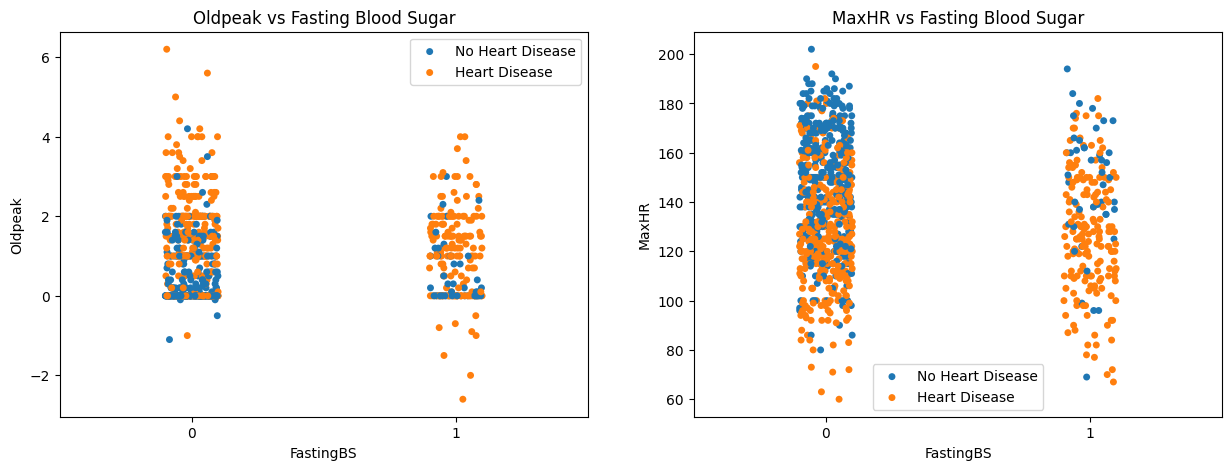

In [61]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'FastingBS',y = numerical_features[i],data = df,hue = 'HeartDisease');
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'FastingBS',y = numerical_features[i],data = df,hue = 'HeartDisease');
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar'
    plt.title(title);

##Result
* Above the age 50, heart diseases are found throughout the data irrespective of the patient being diagnosed with Fasting Blood Sugar or not.
* Fasting Blood Sugar with Resting BP over 100 has displayed more cases of heart diseases than patients with no fasting blood sugar.
* Cholesterol with Fasting Blood Sugar does not have a clear cut relationship.
* Patients that have not been found positive with Fasting Blood Sugar but have maximum heart rate below 130 are more prone to heart diseases.

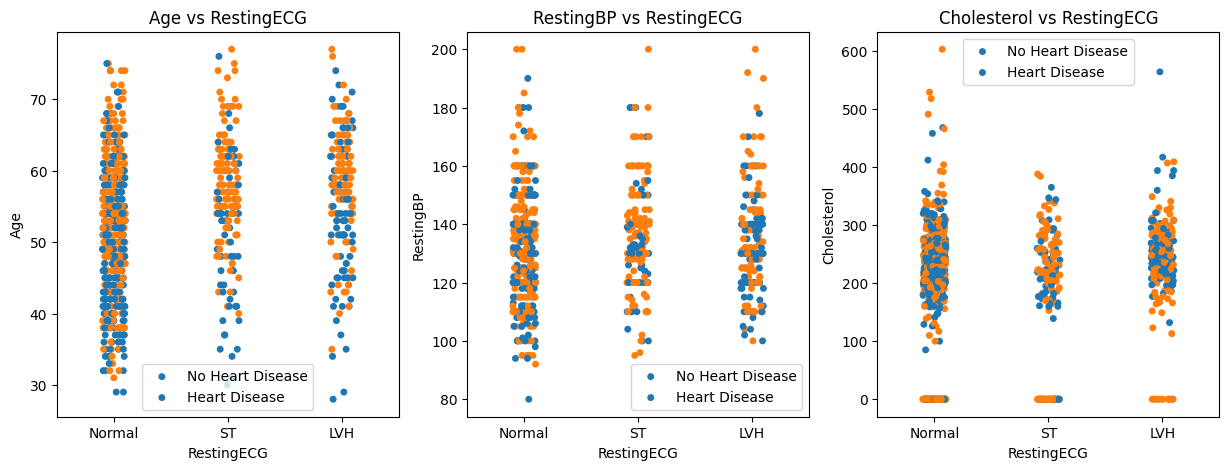

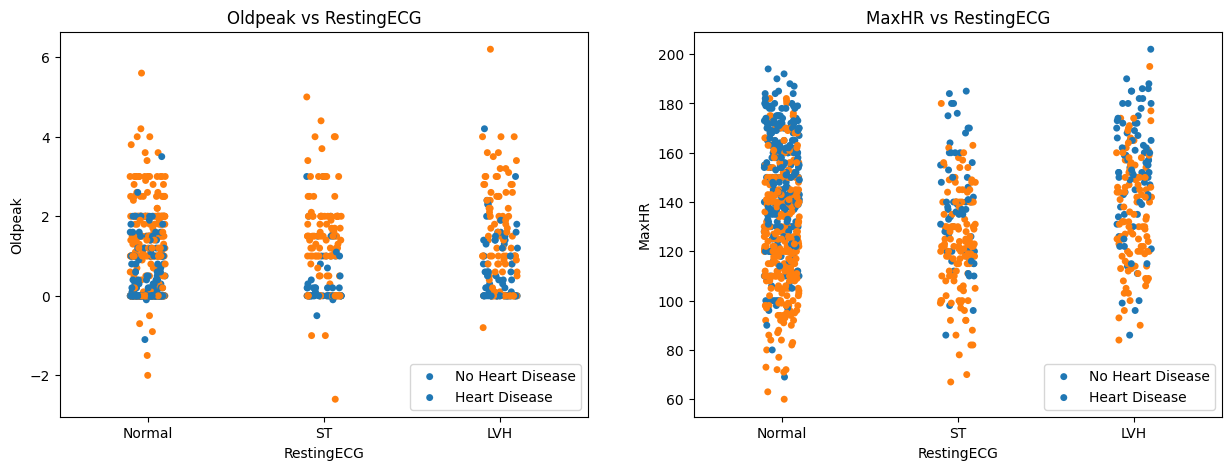

In [62]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'RestingECG',y = numerical_features[i],data = df,hue = 'HeartDisease');
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'RestingECG',y = numerical_features[i],data = df,hue = 'HeartDisease');
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG'
    plt.title(title);

##Result
* Heart diseases with RestingECG values of Normal, ST and LVH are detected starting from 30,40 & 40 respectively. Patients above the age of 50 are more prone than any other ages irrespective of RestingECG values.
* Heart diseases are found consistently throughout any values of RestingBP and RestingECG.
* Cholesterol values between 200 - 300 coupled with ST value of RestingECG display a patch of patients suffering from heart diseases.
* For maximum Heart Rate values, heart diseases are detected in dense below 140 points and Normal RestingECG. ST & LVH throughout the maximum heart rate values display heart disease cases.

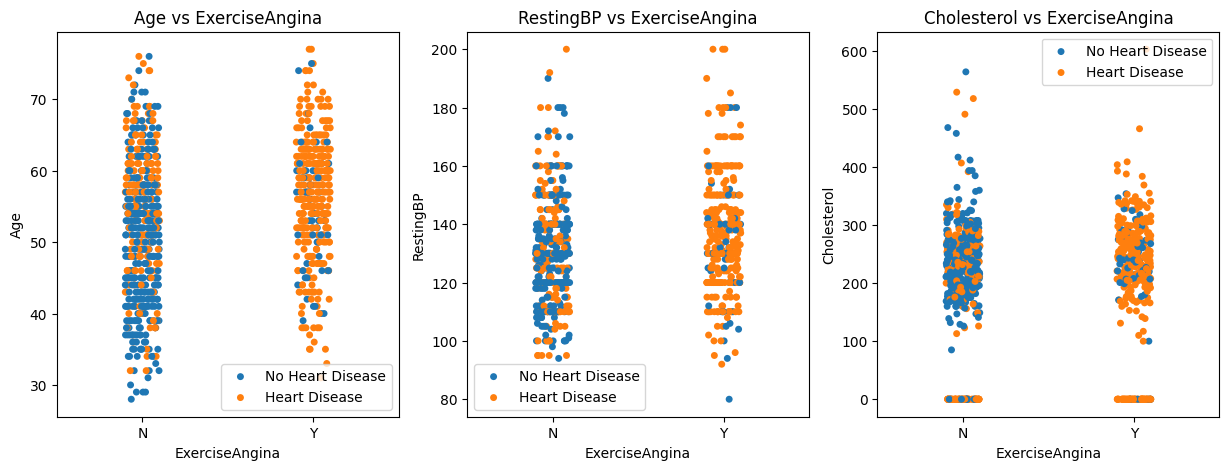

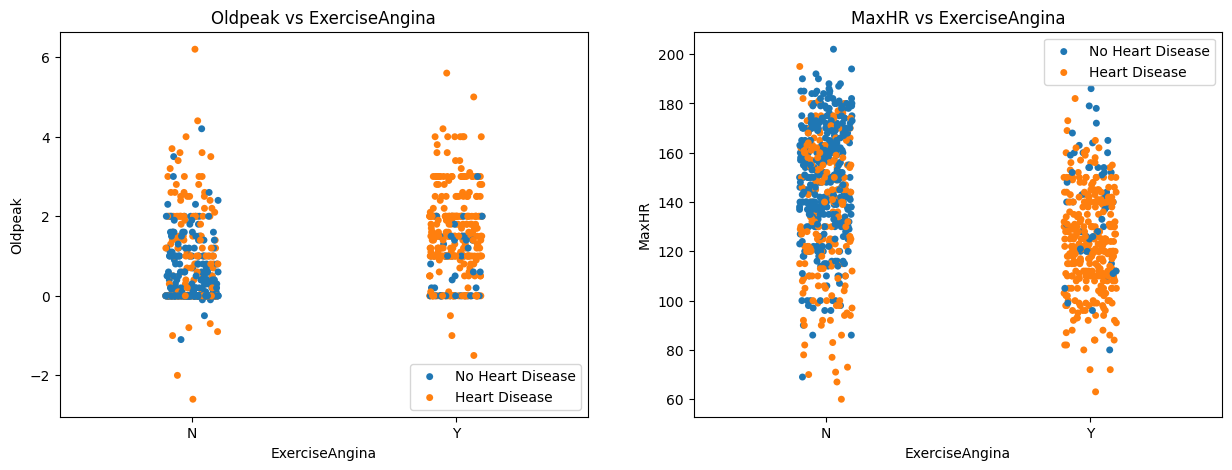

In [63]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_features[i],data = df,hue = 'HeartDisease');
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_features[i],data = df,hue = 'HeartDisease');
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina'
    plt.title(title);

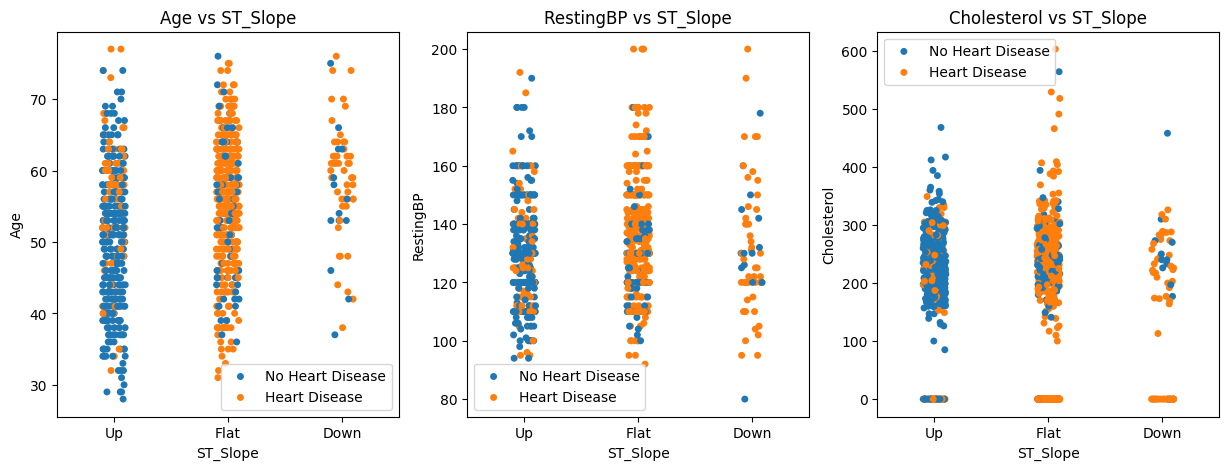

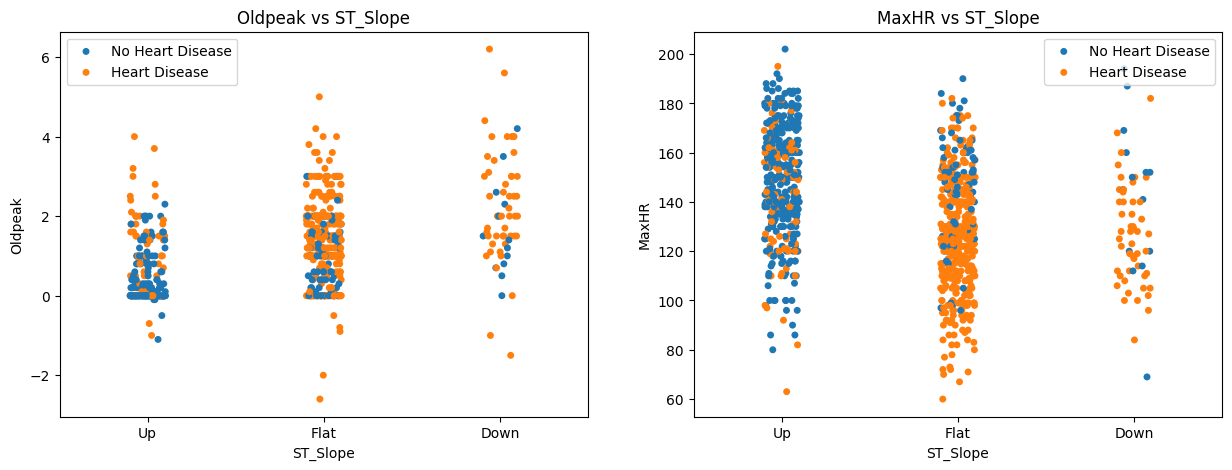

In [64]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ST_Slope',y = numerical_features[i],data = df,hue = 'HeartDisease');
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ST_Slope',y = numerical_features[i],data = df,hue = 'HeartDisease');
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope'
    plt.title(title);

# Summary of EDA

* **Categorical Features** :
1. **Sex** : Male > Female
2. **ChestPainType** : ASY > NAP > ATA > TA
3. **FastingBS** : ( FBS < 120 mg/dl ) > ( FBS > 120 mg/dl)
4. **RestingECG** : Normal > ST > LVH
5. **ExerciseAngina** : Angina > No Angina
6. **ST_Slope** : Flat > Up > Down

* **Numerical Features** :
1. **Age** : 50+
2. **RestingBP** : 95 - 170
3. **Cholesterol** : 160 - 340
4. **MaxHR** : 70 - 180
5. **Oldpeak** : 0 - 4

In [65]:
# Normalizing and Standardizing values

from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler()
ss = StandardScaler()

df['Oldpeak'] = mms.fit_transform(df[['Oldpeak']])
df['Age'] = ss.fit_transform(df[['Age']])
df['RestingBP'] = ss.fit_transform(df[['RestingBP']])
df['Cholesterol'] = ss.fit_transform(df[['Cholesterol']])
df['MaxHR'] = ss.fit_transform(df[['MaxHR']])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.432206,M,ATA,0.414627,0.824126,0,Normal,1.383339,N,0.295455,Up,0
1,-0.478057,F,NAP,1.526360,-0.174164,0,Normal,0.754736,N,0.409091,Flat,1
2,-1.750256,M,ATA,-0.141240,0.769174,0,ST,-1.523953,N,0.295455,Up,0
3,-0.584074,F,ASY,0.303453,0.137229,0,Normal,-1.131075,Y,0.465909,Flat,1
4,0.052026,M,NAP,0.970493,-0.036784,0,Normal,-0.581047,N,0.295455,Up,0


In [66]:
# Converting categorical data to numerical data for model training

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['Sex']=le.fit_transform(df['Sex'])
df['RestingECG']=le.fit_transform(df['RestingECG'])
df['ChestPainType']=le.fit_transform(df['ChestPainType'])
df['ExerciseAngina']=le.fit_transform(df['ExerciseAngina'])
df['ST_Slope']=le.fit_transform(df['ST_Slope'])

In [67]:
print("Sex:",df['Sex'].unique())
print("RestingECG:",df['RestingECG'].unique())
print("ChestPainType:",df['ChestPainType'].unique())
print("ExerciseAngina:",df['ExerciseAngina'].unique())
print("ST_Slope:",df['ST_Slope'].unique())
print(df.head())

Sex: [1 0]
RestingECG: [1 2 0]
ChestPainType: [1 2 0 3]
ExerciseAngina: [0 1]
ST_Slope: [2 1 0]
        Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0 -1.432206    1              1   0.414627     0.824126          0   
1 -0.478057    0              2   1.526360    -0.174164          0   
2 -1.750256    1              1  -0.141240     0.769174          0   
3 -0.584074    0              0   0.303453     0.137229          0   
4  0.052026    1              2   0.970493    -0.036784          0   

   RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0           1  1.383339               0  0.295455         2             0  
1           1  0.754736               0  0.409091         1             1  
2           2 -1.523953               0  0.295455         2             0  
3           1 -1.131075               1  0.465909         1             1  
4           1 -0.581047               0  0.295455         2             0  


<Axes: >

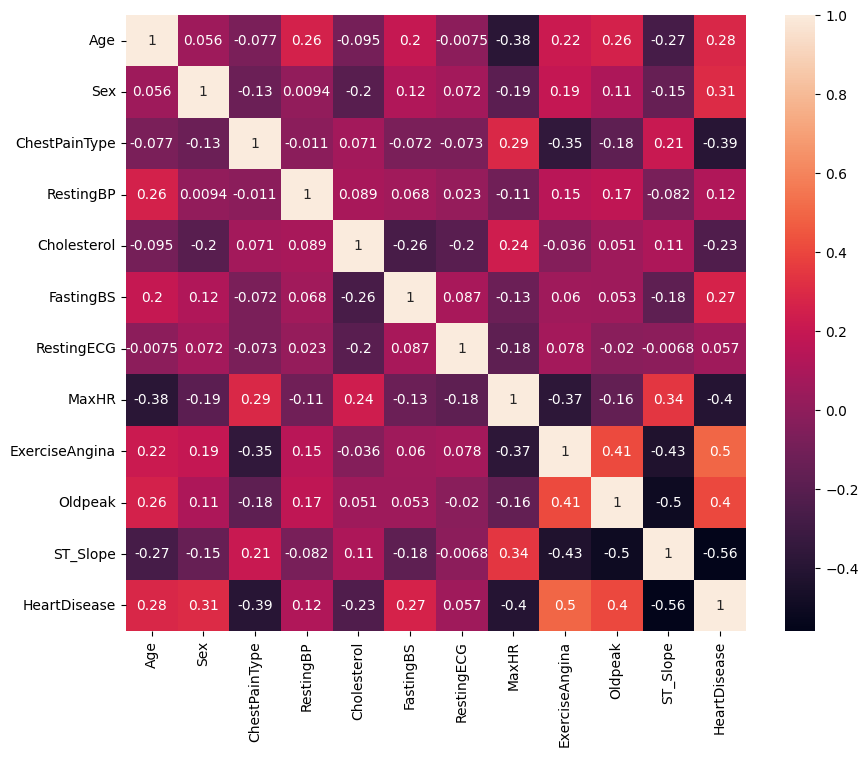

In [68]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

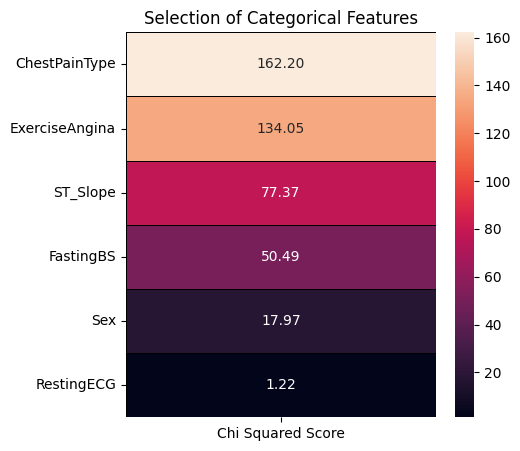

In [69]:
# Finding the weakest Categorical and Numerical attribute and removing it from model training

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = df.loc[:,categorical_features[:-1]]
target = df.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

**RestingECG** is not important for prediction (Low Chi Square Value)

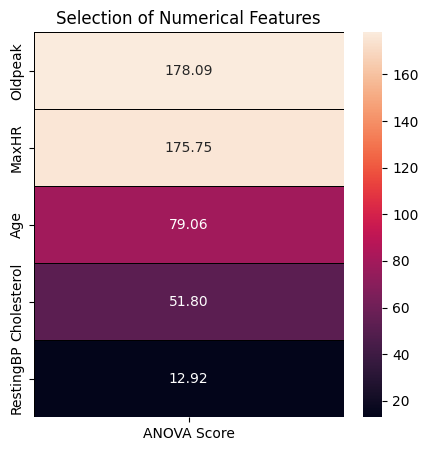

In [70]:
from sklearn.feature_selection import f_classif

features = df.loc[:,numerical_features]
target = df.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

**RestingBP** is also removed from modelling

# Modelling

In [71]:
x = df.drop(['HeartDisease','RestingBP','RestingECG'], axis=1)
y = df['HeartDisease']
print(x.shape)
print(y.shape)

(917, 9)
(917,)


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [75]:
# splitting tuples into trainign and testing using a 80-20 train-test split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print("X_train: ", x_train.shape)
print("X_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (733, 9)
X_test:  (184, 9)
y_train:  (733,)
y_test:  (184,)


In [81]:
def model(classifier):

    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))

def model_evaluation(classifier):

    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,fmt ='')

    print(classification_report(y_test,classifier.predict(x_test)))

# 1. Logistic Regression



Accuracy :  85.87%
Cross Validation Score :  90.68%
ROC_AUC Score :  85.52%
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        83
           1       0.86      0.89      0.87       101

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



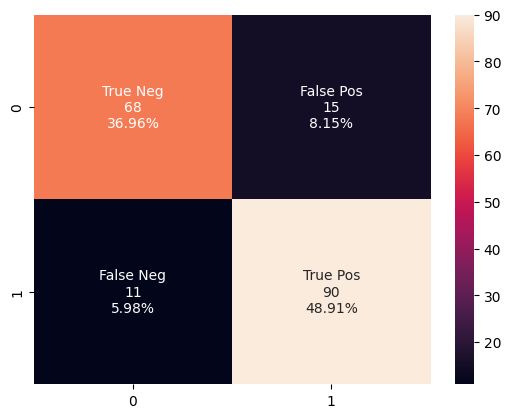

In [82]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2')
model(classifier_lr)
model_evaluation(classifier_lr)

# 2. Support Vector Classifier

Accuracy :  86.41%
Cross Validation Score :  90.33%
ROC_AUC Score :  85.91%
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        83
           1       0.85      0.91      0.88       101

    accuracy                           0.86       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



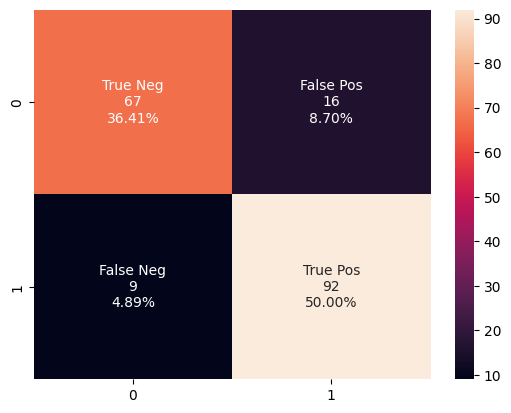

In [83]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'linear',C = 0.1)
model(classifier_svc)
model_evaluation(classifier_svc)

# 3. Decision Tree Classifier

Accuracy :  87.50%
Cross Validation Score :  90.33%
ROC_AUC Score :  87.22%
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        83
           1       0.88      0.90      0.89       101

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



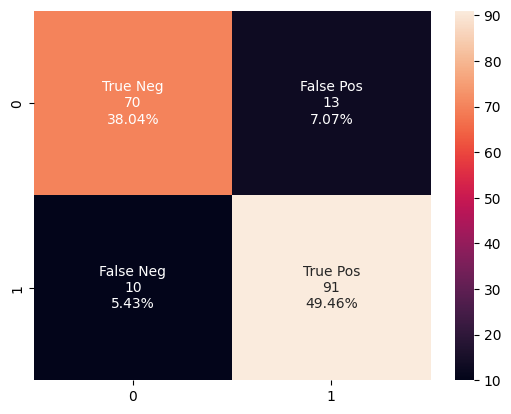

In [84]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)
model(classifier_dt)
model_evaluation(classifier_dt)

# 4. Random Forest Classifier

Accuracy :  86.96%
Cross Validation Score :  92.39%
ROC_AUC Score :  86.40%
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        83
           1       0.85      0.92      0.89       101

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184



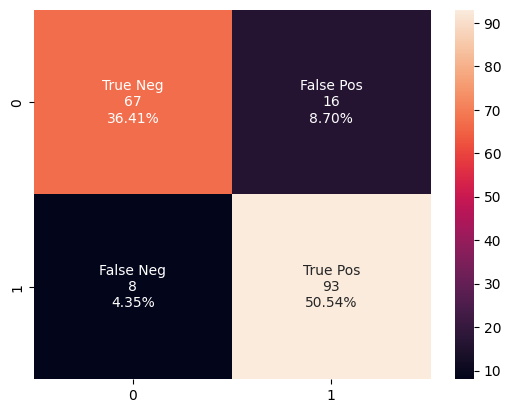

In [85]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)
model(classifier_rf)
model_evaluation(classifier_rf)

# 5. K Nearest Neighbors

Accuracy :  88.59%
Cross Validation Score :  87.49%
ROC_AUC Score :  88.64%
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        83
           1       0.91      0.88      0.89       101

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



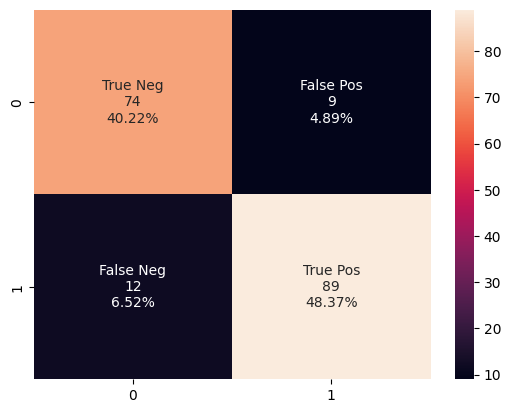

In [86]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)
model(classifier_knn)
model_evaluation(classifier_knn)

# Final Result : K Nearest Neighbours has Highest Accuracy of 88.59%